In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
od_df = pd.read_excel('/Users/abrahamflamholz/BDrive/Research/Savage/CarboxeColi/phenotyping/090119 CCMB1 mutants matched cultures/090619 CCMB1 mutant ODs.xlsx')

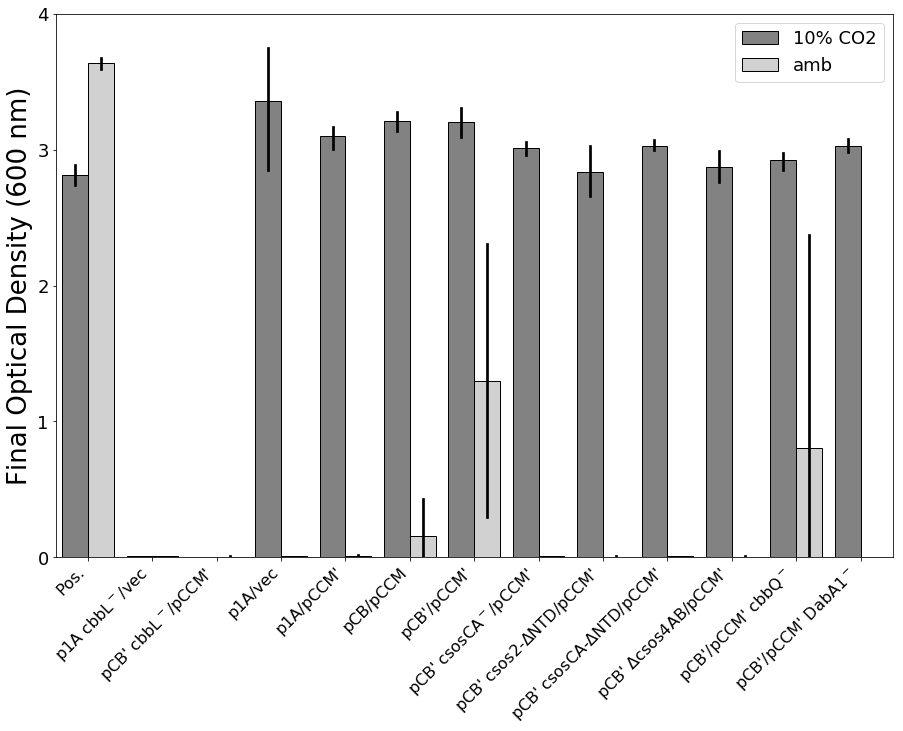

In [3]:
plt.figure(figsize=(15,10))
greys = sns.color_palette('Greys')
custom_pal = {'10% CO2': greys[3], 'amb': greys[1]}
hatches = []

order = ['CAfree+EGFP/HCAII', 'lsK194M/AGFP', '13.6 K194M/Ccm11', 'ls/AGFP', 'LS/13.6 HnCcm11', 'gg9/HnCcm11', '13.6 recons',
 '13.6 C173s/Ccm11', '13.6 dS2/Ccm11', '13.6 dS3/Ccm11', '13.6 d4AB/Ccm11',
 '13.6 Cb11/ dCbbQ', '13.6 Cb11/ dDab1', ]
ticknames = ['Pos.', "p1A cbbL$^-$/vec", "pCB' cbbL$^-$/pCCM'", 'p1A/vec', "p1A/pCCM'", 'pCB/pCCM', "pCB'/pCCM'",
 "pCB' csosCA$^-$/pCCM'", "pCB' csos2-$\Delta$NTD/pCCM'", "pCB' csosCA-$\Delta$NTD/pCCM'", "pCB' $\Delta$csos4AB/pCCM'",
 "pCB'/pCCM' cbbQ$^-$", "pCB'/pCCM' DabA1$^-$", ]
patches = sns.barplot(data=od_df, x='strain_name', y='OD', hue='condition', order=order,
                      palette=custom_pal, edgecolor='k', errcolor='k', hue_order=['10% CO2', 'amb'])

plt.legend(fontsize=18)
plt.xticks(np.arange(len(ticknames)), ticknames, rotation=45, fontsize=16, ha='right')
plt.yticks(np.arange(0, 4.1, 1.0), fontsize=18)
plt.xlabel('')
plt.ylabel('Final Optical Density (600 nm)', fontsize=26)
plt.show()

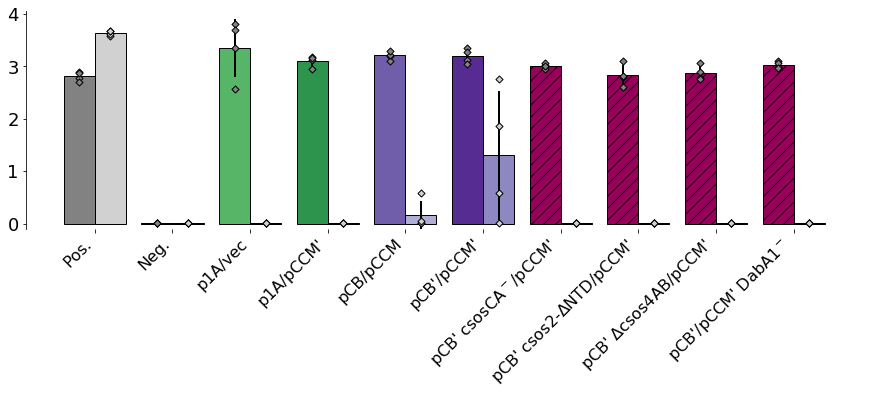

In [98]:
plt.figure(figsize=(15,4))
greys = sns.color_palette('Greys')
greens = sns.color_palette('Greens')
purples = sns.color_palette('Purples')
oranges = sns.color_palette('Oranges')
reds = sns.color_palette('Reds')
reddish_purple = sns.set_hls_values(sns.xkcd_rgb['reddish purple'], 0.9, 0.3, 1)

custom_pal = {'10% CO2': greys[3], 'amb': greys[1]}

order = ['CAfree+EGFP/HCAII', 'lsK194M/AGFP', 'ls/AGFP', 'LS/13.6 HnCcm11', 'gg9/HnCcm11', '13.6 recons',
 '13.6 C173s/Ccm11', '13.6 dS2/Ccm11', '13.6 d4AB/Ccm11', '13.6 Cb11/ dDab1', ]
ticknames = ['Pos.', "Neg.", 'p1A/vec', "p1A/pCCM'", 'pCB/pCCM', "pCB'/pCCM'",
 "pCB' csosCA$^-$/pCCM'", "pCB' csos2-$\Delta$NTD/pCCM'", "pCB' $\Delta$csos4AB/pCCM'",
 "pCB'/pCCM' DabA1$^-$", ]

amb_df = od_df[od_df.condition == 'amb']
highCO2_df = od_df[od_df.condition == '10% CO2']


bars_10pct = [
    greys[3], greys[3], # controls - grey
    # Rubisco alone/no carboxysome - green
    greens[-3], greens[-2], 
    # Full CCM gene set
    purples[-2], purples[-1],
    # Mutants with most of the CCM are red/purple
    reddish_purple, reddish_purple, reddish_purple, reddish_purple]

bars_amb = [
    greys[1], greys[1],
    greens[-5], greens[-4],
    purples[-4], purples[-3],
    reddish_purple, reddish_purple, reddish_purple, reddish_purple]

xs = np.arange(len(order))
mean_10pct = highCO2_df.groupby('strain_name').mean()
mean_amb = amb_df.groupby('strain_name').mean()

bars_10pct = plt.bar(xs-0.2, mean_10pct.loc[order].OD.values, color=bars_10pct, width=0.4, edgecolor='k')
plt.bar(xs+0.2, mean_amb.loc[order].OD.values, color=bars_amb, width=0.4, edgecolor='k')

for bar in bars_10pct[-4:]:
    bar.set_hatch('//')

for i, name in enumerate(order):
    my_xs = np.ones(4)*i
    plt.scatter(my_xs-0.2, highCO2_df[highCO2_df.strain_name == name].OD.values,
                marker='D', s=25, color=greys[3], edgecolors='k', zorder=10)
    plt.scatter(my_xs+0.2, amb_df[amb_df.strain_name == name].OD.values,
                marker='D', s=25, color=greys[1], edgecolors='k', zorder=10)

# TODO: prefer CI to std deviation
std_10pct = highCO2_df.groupby('strain_name').std()
std_amb = amb_df.groupby('strain_name').std()
plt.errorbar(xs-0.2, mean_10pct.loc[order].OD.values, yerr=std_10pct.loc[order].OD.values, color='k', ls='', elinewidth=2)
plt.errorbar(xs+0.2, mean_amb.loc[order].OD.values, yerr=std_amb.loc[order].OD.values, color='k', ls='', elinewidth=2)


plt.xticks(np.arange(len(ticknames)), ticknames, rotation=45, fontsize=16, ha='right')
plt.yticks(np.arange(0, 4.1, 1.0), fontsize=18)
plt.xlabel('')
plt.ylabel('', fontsize=26)
plt.ylim(-0.1, 4.05)
sns.despine(bottom=True)
plt.show()